## South of the River: Evictions and Development in Ward 8


Contributors: Nicole Bills and Allison Lee

### Table of Contents
1. <a href='#goal'>Problem Statement</a>
2. <a href='#datasources'>Data Sources</a>
3. <a href='#collection'>Data Collection</a>
4. <a href='#testing'>Hypothesis Test I</a>
5. <a href='#test2'>Hypothesis Test II</a>
5. <a href='#effect'>Effect Size</a>
6. <a href='#findings'>Findings and Analysis</a>
7. <a href='#rec'>Recommendations</a>

In [67]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<a id='goal'></a>
### Problem Statement

The goal of this analysis is to gain a better understanding of eviction rates in Ward 8, Washington D.C. We aim to test two hypotheses: 
1. There is a significant difference between eviction rates in census tracts with Planned Unit Developments (PUDs) and tracts without PUDs. 
2. Census tracts where the poverty rate is above 40 percent have higher eviction rates than those where the poverty rate is below 40 percent.

A planned unit development refers to a plan for the development of residential, institutional, and commercial developments, industrial parks, urban renewal projects, or a combination. 

<a id='datasources'></a>
### Data Sources

The Eviction Lab: https://evictionlab.org/

This research uses data from The Eviction Lab at Princeton University, a project directed by Matthew Desmond and designed by Ashley Gromis, Lavar Edmonds, James Hendrickson, Katie Krywokulski, Lillian Leung, and Adam Porton. The Eviction Lab is funded by the JPB, Gates, and Ford Foundations as well as the Chan Zuckerberg Initiative. More information is found at evictionlab.org.


Open Data DC: https://opendata.dc.gov/
 - Planned Unit Developments: https://opendata.dc.gov/datasets/1b3e77aaa6154d1285af639323b0504f_14/data

<a id='collection'></a>
### Data Cleaning

In [90]:
%run ../python_files/data_cleaning

The Eviction Lab has data at the census tract level. We limited the dataset to 2016 data for census tracts within Ward 8. We also restricted the Open Data DC dataset on PUDs, which was available on the ward level, to Ward 8. We used GoogleMyMaps to overlay a map of D.C. wards with GEOIDs (census tracts) and PUD locations. Using the map as a reference, we manually coded which PUDs and GEOIDs were in Ward 8. 

In [91]:
# Read in original data
evict = pd.read_csv("../data/EvictionLab/tracts.csv")
puds = pd.read_csv("../data/OpenData/Planned_Unit_Development_PUDs.csv")

In [92]:
# Clean Eviction Lab dataset and merge with Open Data PUDs dataset
df = full_clean(evict, puds)

<a id='testing'></a>
### Hypothesis Test I - Development

We selected a significance level of alpha = 0.05. 

We set our null and alternative hypotheses as follows:

**H0:** There is no difference between eviction rates in census tracts with PUDs compared to tracts without PUDs. 

**Ha:** On average, there is a statistically significant difference between eviction rates in tracts with PUDs versus tracts without PUDs.

To test these claims, we compared the means of two samples: one sample of tracts in DC with PUDs, and one sample of tracts without PUDs. We assume the samples are independent and from normally distributed populations, and we use a two-tailed t-test to test if the difference in the means can be attributed to random chance. We selected Welsch's t-test because our sample sizes are small (less than thirty), and we do not assume equal population variances. 

In [89]:
# TO DO ->  prove assumptions have been met
%run ../python_files/hypothesis_tests
%run ../python_files/visualizations

In [54]:
# Create PUD variable and two samples
with_PUDS, no_PUDS = create_PUD_variable_and_samples(df)

<Figure size 720x432 with 0 Axes>

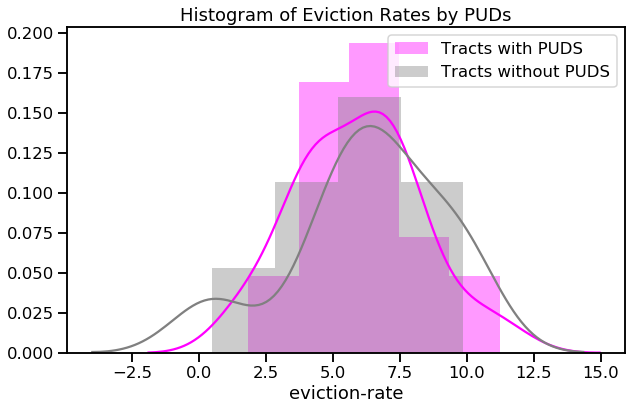

In [55]:
# Create histogram of eviction rates by presence of PUDs in tracts
create_sample_dists(with_PUDS, no_PUDS, 'eviction-rate');
plt.legend(['Tracts with PUDS', 'Tracts without PUDS']);
plt.title('Histogram of Eviction Rates by PUDs');
plt.savefig('images/puds.jpg'); 

In [56]:
hypothesis_test(with_PUDS, no_PUDS, variable = 'eviction-rate', type = 'two-sided', alpha = 0.5)

(Ttest_indResult(statistic=-0.31466609718334176, pvalue=0.7592466663700481),
 'The p-value is greater than alpha; therefore we fail to reject the null hypothesis.')

The p-value is 0.759, meaning there is a 76% chance of obtaining these results when the null hypothesis is true. The difference between the average eviction rates of the two samples is not statistically significant, and we fail to reject the null hypothesis. 

<a id='test2'></a>
### Hypothesis Test II - Poverty

We selected a significance level of alpha = 0.05.

We set our null and alternative hypotheses as follows:

**H0:** Census tracts with poverty rates less than 45% have the same or lower rates of eviction. 

**Ha:** Census tracts with poverty rates less than 45% have higher rates of eviction. 

To test our alternative hypothesis, we decided to use a one-tailed t-test. This test was appropriate because we are dealing with small sample sizes, and unknown population variances (where we assume the variances are not equal). 

In [70]:
# Create two samples from datafrome of census tracts with high and lower poverty rates
high, lower = create_Pov_variable_and_samples(df)

Text(0.5, 0, 'Eviction Rates')

<Figure size 720x432 with 0 Axes>

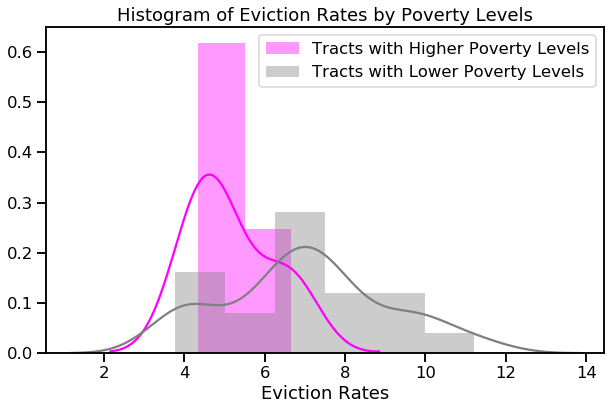

In [81]:
# Create histogram of eviction rates by poverty level
create_sample_dists(high, lower, 'eviction-rate')
plt.legend(['Tracts with Higher Poverty Levels', 'Tracts with Lower Poverty Levels'])
plt.title('Histogram of Eviction Rates by Poverty Levels')
plt.xlabel('Eviction Rates')

In [82]:
hypothesis_test(lower, high, variable = 'eviction-rate', type = 'two-sided', alpha = 0.05)

(Ttest_indResult(statistic=3.0713989209305685, pvalue=0.005674384207238882),
 'The p-value is less than alpha; therefore, we reject the null hypothesis.')

The scipy stats test returns a p-value for a two-sided ttest. To evaluate the one-tailed p-value against our alpha, we need to divide the output p-value by two. 

There is a 0.7% chance of obtaining these results when the null hypothesis is true. In other words, there is a statistically significant difference between average eviction rates of high poverty areas (poverty rate above 40%) and lower poverty areas ( below or equal to 40%). We therefore reject the null hypothesis that lower poverty areas have lower eviction rates or no impact. Our findings suggest that, in terms of statistical significance, lower poverty areas have higher eviction rates on average. 

<a id='effect'></a>
### Effect Size

Effect size provides a measure to let us know whether it is important, or practically significant, that we found a statistically significant difference between average eviction rates in high poverty and lower poverty areas. It gives us a way to estimate how "big" of a difference this result is. 

In [87]:
calculate_cohen_d(lower, high, variable = 'eviction-rate')

"Cohen's D: 0.9977527708238616"

The Cohen's D statistic is greater than 0.8, the typical threshold for a large' effect size). Thus, our Cohen's D statistic suggests that the size of the effect is large.

<a id='findings'></a>
### Findings and Analysis

In conclusion, we found:
 - **Planned Unit Developments are not associated with eviction rates.** There does not appear to be a statistically significant difference between census tracts with Planned Unit Developments and those without. This suggests that other factors aside from planned developments may be associated with evictions in Ward 8. 

 - **Higher poverty areas do not have higher eviction rates.** There is a statistically significant difference between average eviction rates in areas with higher poverty levels, and areas with lower poverty levels. Interestingly, our findings suggest we cannot reject the null hypothesis that lower poverty areas have lower eviction rates or no impact. This finding suggests that there may be other factors at play that influence eviction rates--for example, the presence of safety nets or assistance programs for higher poverty areas.

<a id='rec'></a>
### Recommendations

1. **More data.** Conduct these tests on a more robust dataset. 

There do not appear to be any datasets that currently link data at the ward-level to data at the census tract level, as the census tracts do not fit neatly into ward areas. To address this challenge, we focused on manually creating a column to link PUD census tract locations to their respective Wards based on an overlay visualization of the two datasets. Given the time constraints, we only focused on Ward 8. These findings would be more robust if these tests were conducted on a larger dataset. 

2. **Explore the relationship between poverty levels and eviction rates in Ward 8.** 

If our findings hold over a more robust dataset, it would be interesting to explore whether certain programs or safety nets exist in Ward 8 to protect communities from evictions in higher poverty census tracts. 

3. **Explore eviction rates along further dimensions.** 

Our exploratory analysis suggests that there are a multitude of factors that may be associated with higher eviction rates--for example, race or employment levels. The more in-depth our understanding of the factors that are associated with high eviction-rates (factors which may reflect broader inequalities in American society), the better to inform policy-making for more equitable housing. 